In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Define inputs
First simulation will be CsCl, which has a cubic lattice and lattice parameter a = 0.4217 nm

Its motif is Cs(0, 0, 0) and Cl(1/2, 1/2, 1/2)

one should expect all peaks to be visible and equally spaced out

## Find lattice spacing in reciprocal space

## Relating N to lattice parameters

In [2]:
N = {1 : np.array([1,0,0]), 2 : np.array([1, 1, 0]), 3 : np.array([1, 1, 1]), 4 : np.array([2, 0, 0]), 5 : np.array([2, 1, 0]), 6 : np.array([2, 1, 1]), 8 : np.array([2, 2, 0]),
         9 : np.array([3, 0, 0]), 10 : np.array([3, 1, 0]), 11 : np.array([3, 1, 1]), 12 : np.array([2, 2, 2]), 13 : np.array([3, 2, 0]) , 14 : [3, 2, 1], 16 : np.array([4, 0, 0]),
         17 : np.array([4, 1, 0]), 18 : np.array([4, 1, 1]), 19 : np.array([3, 3, 1]), 20 : np.array([4, 2, 0]), 21 : np.array([4, 2, 1]), 22 : np.array([3, 3, 2]) , 24 : np.array([4, 2, 2]),
    25 : np.array([4, 3, 0]), 26 : np.array([4, 3, 1]), 27 : np.array([3, 3, 3])}

exceptions = [0, 7, 15, 23]

## Figure out structure factor

There will be systematic abscences where $ F_{h k l} = 0 $

no need for abscence rules as structure factor will be determined to be 0 if absent

In [3]:
def structureFactor(lp, N):
    F_hkl = 0
    h = N[0]
    k = N[1]
    l = N[2]
    for i in lp:
        F_hkl += np.e**(2*np.pi*1j*(h*i[0] + k*i[1] + l*i[2]))
    
    return F_hkl

In [4]:
# using Bragg's law wl = 2d_hklsin(theta)
def find2theta(N, d, wl = 0.154):
    if wl*N**(1/2)/(2*d) > 1:
        return 0
    twoTheta = 2*np.math.asin(wl*N**(1/2)/(2*d))*180/np.pi
    return twoTheta

In [5]:
#finds the 2theta peaks
def findPeaks(lp):
    peaks = []
    structureFactors = []

    for i in range(28):
        if i in exceptions:
            continue
        dummy = structureFactor(lp, N[i])
        if (dummy.real**2 + dummy.imag**2)**(1/2) < 10**(-10):
            continue
        else:
            peaks.append(i)
            structureFactors.append(dummy)
            
    return (peaks, structureFactors)

In [6]:
def findThetaPositions(peaks, a):
    positions = []
    for i in peaks:
        dummy = find2theta(i, a)
        if dummy == 0:
            continue
        positions.append(dummy)
    return positions

In [7]:
def findDspacing(peaks, a):
    dPositions = []
    for i in peaks:
        d = a/i**(1/2)
        dPositions.append(d)
    return dPositions

In [8]:
def twoThetaPlot(positions, y):
    #the 2theta plot
    plt.bar(positions, y)

    #creates axis titles
    plt.xlabel('2θ / deg')
    plt.ylabel('relative counts')

    #gives titles to plot
    plt.title('Diffraction plot')

    plt.tight_layout()

In [9]:
def dSpacingPlot(dPositions, y):
    #the d spacing plot
    plt.scatter(dPositions, y)

    #creates axis titles
    plt.xlabel('d-spacing / nm')
    plt.ylabel('relative counts')

    #gives titles to plot
    plt.title('Diffraction plot')

    plt.tight_layout()

In [10]:
def generatePlots(lp, a, dPlot = False):
    peaks = findPeaks(lp)[0]
    if dPlot == False:
        positions = findThetaPositions(peaks, a)
        y = [1 for i in range(len(positions))]
        ThetaPlot = twoThetaPlot(positions, y)
    else:
        dPositions = findDspacing(peaks, a)
        y = [1 for i in range(len(dPositions))]
        dSpacingPlot(dPositions, y)
    

In [11]:
#lattice parameter / a float value given in nm
#for CsCl
#a = 0.4127
##lattice points / list of all lattice point
#lp = [(0, 0, 0)]

# #for NaCl
# a = 0.5667
# lp = [(0, 0, 0), (1/2, 1/2, 0), (1/2, 0, 1/2), (0, 1/2, 1/2)]

# for diamond
a = 0.3567
lp = [(0, 0, 0), (1/2, 1/2, 0), (1/2, 0, 1/2), (0, 1/2, 1/2), (1/4, 1/4, 1/4), (3/4, 3/4, 1/4), (3/4, 1/4, 3/4), (1/4, 3/4, 3/4)]

#motif / if motif has more than one of a similar atom 
##Is this nescesarry??

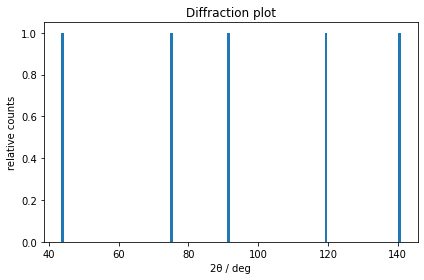

In [12]:
generatePlots(lp, a, dPlot = False)

## scattering factor
To get the intensity one needs the scattering factor. this is often tabulated
On wikipedia this is cited as a source
http://lampx.tugraz.at/~hadley/ss1/crystaldiffraction/atomicformfactors/formfactors.php

one can attempt to use numbers from here

In [13]:
def scatteringFactor(d, a, b, c):
    "a, b are constants that can be summed over, c is a constant"
    G = 2/d
    fd = c
    for i in range(4):
        fG = a[i]*np.e**(-b[i]*(G/(4*np.pi)**2))
    return fG

In [14]:
a = [2.31, 1.02, 1.5886, 0.865]
b = [20.8439, 10.2075, 0.5678, 51.6512]
c = [-0.1932]

scatteringFactor(0.357, a, b, c)

0.1384238411585082

In [15]:
2/0.3275

6.106870229007633

In [16]:
# try d spacing with reciprocal space
# needed: lattice vectors + parameter


In [17]:
def reciprocalBasis(a, b, c):
# where a b and c are numpy arrays
    V = np.cross(a, b)@c
    ar = 2*np.pi*np.cross(b, c)/V
    br = 2*np.pi*np.cross(c, a)/V
    cr = 2*np.pi*np.cross(a, b)/V
    reciprocalBasis = np.array([ar, br, cr])
    
    return reciprocalBasis


In [18]:
def reciprocalVector(reciprocalBasis, h, k, l):
    G = h*reciprocalBasis[0] + k*reciprocalBasis[1] + l*reciprocalBasis[2]
    return G

In [19]:
def dSpacing(G):
    d = 2*np.pi/sum(G**2)**(1/2)
    return d

In [20]:
a = np.array([3.789, 0, 0])
b = np.array([0, 3.789, 0])
c = np.array([0, 0, 9.537])
basis = reciprocalBasis(a, b, c)
G = reciprocalVector(basis, 0, 1, 1)
d = dSpacing(G)
wl = 1.54187
twoTheta = 2*np.math.asin(wl/(2*d))*180/np.pi
print(d, twoTheta)

3.5212734027517545 25.293143271631266


In [21]:
basis[2]

array([0.        , 0.        , 0.65882199])

In [22]:
import itertools
permutationObject = itertools.permutations("012345", 3)

permutationsList = list(permutationObject)

print(permutationsList)
print(len(permutationsList))

[('0', '1', '2'), ('0', '1', '3'), ('0', '1', '4'), ('0', '1', '5'), ('0', '2', '1'), ('0', '2', '3'), ('0', '2', '4'), ('0', '2', '5'), ('0', '3', '1'), ('0', '3', '2'), ('0', '3', '4'), ('0', '3', '5'), ('0', '4', '1'), ('0', '4', '2'), ('0', '4', '3'), ('0', '4', '5'), ('0', '5', '1'), ('0', '5', '2'), ('0', '5', '3'), ('0', '5', '4'), ('1', '0', '2'), ('1', '0', '3'), ('1', '0', '4'), ('1', '0', '5'), ('1', '2', '0'), ('1', '2', '3'), ('1', '2', '4'), ('1', '2', '5'), ('1', '3', '0'), ('1', '3', '2'), ('1', '3', '4'), ('1', '3', '5'), ('1', '4', '0'), ('1', '4', '2'), ('1', '4', '3'), ('1', '4', '5'), ('1', '5', '0'), ('1', '5', '2'), ('1', '5', '3'), ('1', '5', '4'), ('2', '0', '1'), ('2', '0', '3'), ('2', '0', '4'), ('2', '0', '5'), ('2', '1', '0'), ('2', '1', '3'), ('2', '1', '4'), ('2', '1', '5'), ('2', '3', '0'), ('2', '3', '1'), ('2', '3', '4'), ('2', '3', '5'), ('2', '4', '0'), ('2', '4', '1'), ('2', '4', '3'), ('2', '4', '5'), ('2', '5', '0'), ('2', '5', '1'), ('2', '5', '3

In [23]:
dSpacing(G)


3.5212734027517545

In [24]:
# generating permutations for no cubic systems where [100] =/= [001]


In [25]:
combinationsObject = itertools.combinations("012345", 3)
combinationsList = list(combinationsObject)
print(combinationsList)
print(len(combinationsList))

[('0', '1', '2'), ('0', '1', '3'), ('0', '1', '4'), ('0', '1', '5'), ('0', '2', '3'), ('0', '2', '4'), ('0', '2', '5'), ('0', '3', '4'), ('0', '3', '5'), ('0', '4', '5'), ('1', '2', '3'), ('1', '2', '4'), ('1', '2', '5'), ('1', '3', '4'), ('1', '3', '5'), ('1', '4', '5'), ('2', '3', '4'), ('2', '3', '5'), ('2', '4', '5'), ('3', '4', '5')]
20


In [26]:
productObject = itertools.product("012345", repeat = 3)
productList = list(productObject)
print(productList)
print(len(productList))

[('0', '0', '0'), ('0', '0', '1'), ('0', '0', '2'), ('0', '0', '3'), ('0', '0', '4'), ('0', '0', '5'), ('0', '1', '0'), ('0', '1', '1'), ('0', '1', '2'), ('0', '1', '3'), ('0', '1', '4'), ('0', '1', '5'), ('0', '2', '0'), ('0', '2', '1'), ('0', '2', '2'), ('0', '2', '3'), ('0', '2', '4'), ('0', '2', '5'), ('0', '3', '0'), ('0', '3', '1'), ('0', '3', '2'), ('0', '3', '3'), ('0', '3', '4'), ('0', '3', '5'), ('0', '4', '0'), ('0', '4', '1'), ('0', '4', '2'), ('0', '4', '3'), ('0', '4', '4'), ('0', '4', '5'), ('0', '5', '0'), ('0', '5', '1'), ('0', '5', '2'), ('0', '5', '3'), ('0', '5', '4'), ('0', '5', '5'), ('1', '0', '0'), ('1', '0', '1'), ('1', '0', '2'), ('1', '0', '3'), ('1', '0', '4'), ('1', '0', '5'), ('1', '1', '0'), ('1', '1', '1'), ('1', '1', '2'), ('1', '1', '3'), ('1', '1', '4'), ('1', '1', '5'), ('1', '2', '0'), ('1', '2', '1'), ('1', '2', '2'), ('1', '2', '3'), ('1', '2', '4'), ('1', '2', '5'), ('1', '3', '0'), ('1', '3', '1'), ('1', '3', '2'), ('1', '3', '3'), ('1', '3', '4

In [27]:
('1', '1', '0') in productList

True

In [28]:
a = np.array([3.789, 0, 0])
b = np.array([0, 3.789, 0])
c = np.array([0, 0, 9.537])
basis = reciprocalBasis(a, b, c)
peaks = []
for i in productList:
    if i == ("0", "0", "0"):
        continue
    G = reciprocalVector(basis, int(i[0]), int(i[1]), int(i[2]))
    d = dSpacing(G)
    peaks.append((i, d))  
    
print(peaks)

[(('0', '0', '1'), 9.537), (('0', '0', '2'), 4.7685), (('0', '0', '3'), 3.1790000000000003), (('0', '0', '4'), 2.38425), (('0', '0', '5'), 1.9074000000000002), (('0', '1', '0'), 3.789), (('0', '1', '1'), 3.5212734027517545), (('0', '1', '2'), 2.9665251977130715), (('0', '1', '3'), 2.435365578954976), (('0', '1', '4'), 2.017970767662106), (('0', '1', '5'), 1.7037039464467978), (('0', '2', '0'), 1.8945), (('0', '2', '1'), 1.8581918718634125), (('0', '2', '2'), 1.7606367013758772), (('0', '2', '3'), 1.6274265765125417), (('0', '2', '4'), 1.4832625988565358), (('0', '2', '5'), 1.3441514231878435), (('0', '3', '0'), 1.263), (('0', '3', '1'), 1.252068258060878), (('0', '3', '2'), 1.220901187620631), (('0', '3', '3'), 1.1737578009172513), (('0', '3', '4'), 1.1160789289095077), (('0', '3', '5'), 1.0530657728118524), (('0', '4', '0'), 0.94725), (('0', '4', '1'), 0.9426118859918012), (('0', '4', '2'), 0.9290959359317063), (('0', '4', '3'), 0.907806315768998), (('0', '4', '4'), 0.8803183506879386

In [29]:
peaks[('2', '2', '0')]

TypeError: list indices must be integers or slices, not tuple

In [30]:
wl = 1.54

twoThetaPeaks = []
for i in peaks:
    N = int(i[0][0])**2 + int(i[0][1])**2 + int(i[0][2])**2
    if wl*N**(1/2)/(2*i[1]) > 1:
        continue
    twoTheta = 2*np.math.asin(wl*N**(1/2)/(2*i[1]))*180/np.pi
    twoThetaPeaks.append((i[0], twoTheta))

print(twoThetaPeaks)

[(('0', '0', '1'), 9.261994916901077), (('0', '0', '2'), 37.68317323851155), (('0', '0', '3'), 93.21149627257172), (('0', '1', '0'), 23.45062078521675), (('0', '1', '1'), 36.0277554721206), (('0', '1', '2'), 70.95741588372256), (('0', '1', '3'), 177.89270848690205), (('0', '2', '0'), 108.75643397534179), (('0', '2', '1'), 135.81711110505807), (('1', '0', '0'), 23.45062078521675), (('1', '0', '1'), 36.0277554721206), (('1', '0', '2'), 70.95741588372256), (('1', '0', '3'), 177.89270848690205), (('1', '1', '0'), 47.96275454818245), (('1', '1', '1'), 62.269816630763295), (('1', '1', '2'), 107.70130192601648), (('2', '0', '0'), 108.75643397534179), (('2', '0', '1'), 135.81711110505807)]


In [35]:
peaks[1][0][1]

'0'